In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Pandas options
pd.set_option('display.max_colwidth', 100, 'display.max_rows', 300, 'display.max_columns', 300)

### Steps
 1.a.Filter high-value customers
 1.b.tag churn and non-churn
 
 2.Data cleaning - missing values,incorrect datatypes,outlier analysis
 
 3.EDA
 
 4.Derive new features
 
 5.Handling Data Imbalance - under sampling,over sampling,smot (metric to consider-Recall)
 
 6.Reduce the number of variables using pca
 

In [2]:
#read churn data file
churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
#checking data types
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#checking number of rows and columns present in the dataset
churn_data.shape

(99999, 226)

In [5]:
#inspecting data
churn_data.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

#### Distict columns present in the dataset and their business meaning
    1.mobile_number: customers mobile number,unique for each customer,we can drop this attribute
    2.circle_id: defines the telecom circle area
    3.dast_date_of_month*
    4.onnet_mou* : all kinds of calls within the same operator network
    5.offnet_mou* : all kinds of calls outside the operator network
    6.night_pck_user*: Scheme to use during specific night hours only
    7.aon:Age on network
     
 ##### outgoing calls
    1.loc_og_t2o_mou* : local-outgoing-operator to other operator fixed line-minutes of usage
    2.loc_og_t2t_mou* : local-outgoing-operator to same operator (mobile-mobile)-minutes of usage
    3.loc_og_t2m_mou* : local-outgoing-operator to different operator mobile-minutes of usage
    4.loc_og_t2f_mou* : local-outgoing-operator to fixed line of the same operator-minutes of usage
    5.loc_og_t2c_mou* : local-outgoing-operator to its own call centre-minutes of usage
    6.loc_og_mou* : local-outgoing-minutes of usage
    
    7.std_og_t2o_mou* : std calls-outgoing-operator to other operator fixed line-minutes of usage
    8.std_og_t2t_mou* : std calls-outgoing-operator to same operator (mobile-mobile)-minutes of usage
    9.std_og_t2m_mou* : std calls-outgoing-operator to different operator mobile-minutes of usage
    10.std_og_t2f_mou* : std calls-outgoing-operator to fixed line of the same operator-minutes of usage
    11.std_og_t2c_mou* : std calls-outgoing-operator to its own call centre-minutes of usage
    12.std_og_mou* : std calls-outgoing-minutes of usage
    
    13.isd_og_mou* : isd calls-outgoing-minutes of usage
    14.spl_og_mou* : spc calls-outgoing-minutes of usage
    15.og_others* : outgoing-other-minutes of usage
    16.total_og_mou* : total_outgoing-minutes of usage
    
    17.roam_og_mou* : outgoing call when customer is in roaming zone
    
   ##### Incomming calls
    1.loc_ic_t2o_mou* : local-incomming-operator to other operator fixed line-minutes of usage
    2.loc_ic_t2t_mou* : local-incomming-operator to same operator (mobile-mobile)-minutes of usage
    3.loc_ic_t2m_mou* : local-incomming-operator to different operator mobile-minutes of usage
    4.loc_ic_t2f_mou* : local-incomming-operator to fixed line of the same operator-minutes of usage
    5.loc_ic_mou* : local-incomming-minutes of usage
    6.std_ic_t2o_mou* : std calls-incomming-operator to other operator fixed line-minutes of usage
    7.std_ic_t2t_mou* : std calls-incomming-operator to same operator (mobile-mobile)-minutes of usage
    8.std_ic_t2m_mou* : std calls-incomming-operator to different operator mobile-minutes of usage
    9.std_ic_t2f_mou* : std calls-incomming-operator to fixed line of the same operator-minutes of usage
    10.std_ic_mou* : std calls-incomming-minutes of usage
    11.total_ic_mou* : total_incomming-minutes of usage
    12.spl_ic_mou* : spc calls-incomming-minutes of usage
    13.isd_ic_mou* : isd calls-incomming-minutes of usage
    14.ic_others* : incomming-other-minutes of usage
    15.roam_ic_mou* : incomming call when customer is in roaming zone
    
   ##### Recharge
    1.total_rech_num* :total number of recharge
    2.max_rech_amt*:maximum recharge amount
    3.arpu* : average revenue per user
    4.total_rech_num* :total number of recharge
    5.max_rech_amt*:maximum recharge amount
    6.date_of_last_rech*:date of last recharge
    7.last_day_rch_amt*:last day recharge amount
     
   ##### Data Services/Recharge
    1.total_rech_data*:total number of data recharge done by the customer
    2.date_of_last_rech_data*:date of last data recharge
    3.max_rech_data*:maximum amount of data recharge
    4.count_rech_2g*:total number of 2g data recharge done by the customer
    5.count_rech_3g*:total number of 3g data recharge done by the customer
    6.av_rech_amt_data*:average amount of data recharge done by the customer
    7.vol_2g_mb*:total 2g data used by the customer
    8.vol_3g_mb*:total 3g data used by the customer
    9.arpu_3g*:arpu corresponding to 3g data usage
    10.arpu_32g*:arpu corresponding to 2g data usage
    11.monthly_2g*: Number of 2g service schemes with validity equivalent to a month
    12.sachet_2g*: Number of 2g service schemes with validity smaller than a month
    13.monthly_3g*: Number of 3g service schemes with validity equivalent to a month
    14.sachet_3g*: Number of 3g service schemes with validity smaller than a month
    15.fb_user*:Service scheme to avail services of Facebook and similar social networking sites
    16.*_vbc_3g : volume based charges on 3g data services
    

#### Intutive list of columns to drop 
    1.mobile_number

#### Intutive list for derived columns
    1.date_of_last_rech*
    2.date_of_last_rech_data*

### Step 1 : Filter high-value customers

In [6]:
#checking null
print(churn_data['total_rech_amt_6'].isnull().sum())
print(churn_data['total_rech_amt_7'].isnull().sum())
print(churn_data['av_rech_amt_data_6'].isnull().sum())
print(churn_data['av_rech_amt_data_7'].isnull().sum())
print(churn_data['total_rech_data_6'].isnull().sum())
print(churn_data['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [7]:
#impute missing values with 0
churn_data['av_rech_amt_data_6'] = churn_data['av_rech_amt_data_6'].fillna(0)
churn_data['av_rech_amt_data_7'] = churn_data['av_rech_amt_data_7'].fillna(0)
churn_data['total_rech_data_6'] = churn_data['total_rech_data_6'].fillna(0)
churn_data['total_rech_data_7'] = churn_data['total_rech_data_7'].fillna(0)

In [8]:
#checking null
print(churn_data['total_rech_amt_6'].isnull().sum())
print(churn_data['total_rech_amt_7'].isnull().sum())
print(churn_data['av_rech_amt_data_6'].isnull().sum())
print(churn_data['av_rech_amt_data_7'].isnull().sum())
print(churn_data['total_rech_data_6'].isnull().sum())
print(churn_data['total_rech_data_7'].isnull().sum())

0
0
0
0
0
0


In [9]:
#creating new column:total_rech_amt_good_phase
churn_data['total_rech_amt_good_phase'] = churn_data['total_rech_amt_6']+churn_data['total_rech_amt_7']

In [10]:
#creating new column:total_rech_data_amt_good_phase
churn_data['total_rech_data_amt_good_phase'] = (churn_data['total_rech_data_6']*churn_data['av_rech_amt_data_6'])+(churn_data['total_rech_data_7']*churn_data['av_rech_amt_data_7'])

In [11]:
#creating new column:avg_rech_amt_good_phase
churn_data['avg_rech_amt_good_phase'] = (churn_data['total_rech_amt_good_phase']+churn_data['total_rech_data_amt_good_phase'])/2

In [12]:
#finding 70th percentile
cutoff_rech_amt = np.percentile(churn_data['avg_rech_amt_good_phase'],70)
cutoff_rech_amt

478.0

In [13]:
#filter customers having total recharge amt greater than cutoff_rech_amt
churn_data = churn_data[churn_data['avg_rech_amt_good_phase']>cutoff_rech_amt]

In [14]:
churn_data.shape

(29953, 229)

### step 2 : Tag customers as churn and non-churn based on the logic
customers who have not made any calls (either incoming or outgoing) AND
have not used mobile internet even once in the churn phase

In [15]:
churn_data['churn_status'] = np.where(((churn_data['total_ic_mou_9'] == 0) & (churn_data['total_og_mou_9'] == 0) & (churn_data['vol_2g_mb_9'] == 0) & (churn_data['vol_3g_mb_9'] == 0)),1,0)

In [16]:
#list of cols containing _9
import re
def is_cols_9(col):
    if(re.search('_9',col)):
        return col
    
cols   = list(churn_data.columns)
cols_9 = list(filter(is_cols_9,cols))
cols_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [17]:
#drop cols related to churn phase
churn_data = churn_data.drop(cols_9,axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 176 entries, mobile_number to churn_status
dtypes: float64(138), int32(1), int64(28), object(9)
memory usage: 40.3+ MB


In [18]:
#checking shape
churn_data.shape

(29953, 176)

### Step 2:Data Cleaning

### Step 2.1 Handling missing values

In [19]:
#Dropping columns as we have derived new columns from them:total_rech_amt_good_phase,total_rech_data_amt_good_phase,avg_rech_amt_good_phase
churn_data = churn_data.drop(["total_rech_amt_6","total_rech_amt_7","av_rech_amt_data_6","av_rech_amt_data_7",
                              "total_rech_data_6","total_rech_data_7"],axis=1)


In [20]:
churn_data.shape

(29953, 170)

In [21]:
#checking percentage of missing values
null_var=round(churn_data.isnull().sum()/churn_data.shape[0]*100).sort_values(ascending=False)
null_var

night_pck_user_8                  47.0
total_rech_data_8                 47.0
max_rech_data_8                   47.0
count_rech_2g_8                   47.0
count_rech_3g_8                   47.0
av_rech_amt_data_8                47.0
date_of_last_rech_data_8          47.0
fb_user_8                         47.0
arpu_3g_8                         47.0
arpu_2g_8                         47.0
count_rech_2g_6                   44.0
count_rech_3g_6                   44.0
date_of_last_rech_data_6          44.0
arpu_3g_6                         44.0
arpu_2g_6                         44.0
night_pck_user_6                  44.0
max_rech_data_6                   44.0
fb_user_6                         44.0
count_rech_3g_7                   43.0
night_pck_user_7                  43.0
date_of_last_rech_data_7          43.0
arpu_3g_7                         43.0
arpu_2g_7                         43.0
fb_user_7                         43.0
count_rech_2g_7                   43.0
max_rech_data_7          

In [22]:
#List of columns having missing values >35%
drop_columns = null_var[null_var>35].keys()
list(drop_columns)

['night_pck_user_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'max_rech_data_6',
 'fb_user_6',
 'count_rech_3g_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'fb_user_7',
 'count_rech_2g_7',
 'max_rech_data_7']

#### Inspecting columns having more than 35% missing values
    1.Can I impute these,beacuse I dont want to loose data
    2.How significant are these variables in predicting churn?
    3.If unable to impute and if the variables are not significant drop them.
    4.If the variables are significant in predicting churn,check for other solutions

#### Observations
    1.We observe that all the columns are continuous variables.

In [23]:
#column wise EDA

In [24]:
#To remove those columns whose % values are >35%
churn_data=churn_data.drop(columns=drop_columns) #drop() inbuilt function to remove column
churn_data.shape

(29953, 144)

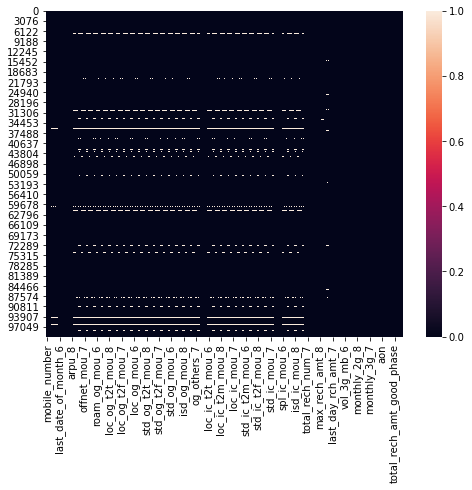

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(churn_data.isnull())
plt.show()

In [26]:
#dropna() by default setting --> row --> to remove those rows whose value is null 
churn_data=churn_data.dropna()

In [27]:
churn_data.shape

(28119, 144)

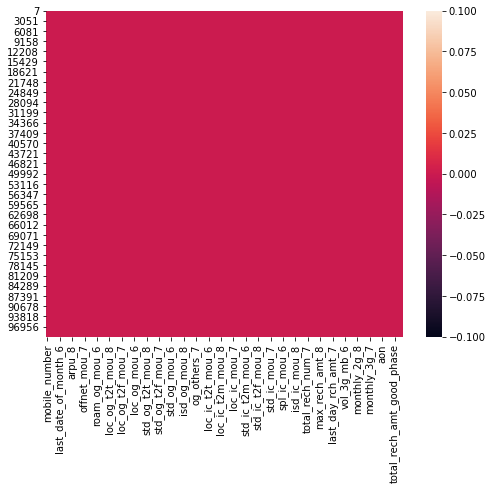

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(churn_data.isnull())
plt.show()

In [29]:
#drop mobile number as it is a unique identifier
mobile_number = churn_data['mobile_number']
churn_data.drop(['mobile_number'],axis=1,inplace=True)

### Handling Imbalance Data

In [30]:
churn_data.isnull().sum().sum()

0

In [31]:
#checking number of rows and columns
churn_data.shape

(28119, 143)

In [32]:
#checking for class imbalance
churn_data['churn_status'].value_counts()

0    26589
1     1530
Name: churn_status, dtype: int64

### Ways to Handle imbalance dataset
1.Use cross validation  like KFold and hyperameter tunning
2.Under Sampling
3.Over Sampling
4.SMOTETomek
5.Ensemble technique

Model Evaluation:
Use various evalution metrics : accuracy_score,confusion_matrix,prescision,recall,classification_report

### Use cross validation  like KFold and hyperameter tunning

In [33]:
churn_data.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 143 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   circle_id                       int64  
 1   loc_og_t2o_mou                  float64
 2   std_og_t2o_mou                  float64
 3   loc_ic_t2o_mou                  float64
 4   last_date_of_month_6            object 
 5   last_date_of_month_7            object 
 6   last_date_of_month_8            object 
 7   arpu_6                          float64
 8   arpu_7                          float64
 9   arpu_8                          float64
 10  onnet_mou_6                     float64
 11  onnet_mou_7                     float64
 12  onnet_mou_8                     float64
 13  offnet_mou_6                    float64
 14  offnet_mou_7                    float64
 15  offnet_mou_8                    float64
 16  roam_ic_mou_6                   float64
 17  roam_ic_mou_7                 

In [34]:
datetime_col = churn_data.select_dtypes(include='object').columns
datetime_col

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [35]:
import datetime

In [36]:
churn_data['last_date_of_month_6'] = pd.to_datetime(churn_data['last_date_of_month_6'])
churn_data['last_date_of_month_7'] = pd.to_datetime(churn_data['last_date_of_month_7'])
churn_data['last_date_of_month_8'] = pd.to_datetime(churn_data['last_date_of_month_8'])

In [37]:
churn_data['date_of_last_rech_6'] = pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_7'] = pd.to_datetime(churn_data['date_of_last_rech_7'])
churn_data['date_of_last_rech_8'] = pd.to_datetime(churn_data['date_of_last_rech_8'])

In [38]:
churn_data.select_dtypes(include='datetime').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [39]:
churn_data['last_date_of_month_6_date'] = pd.to_datetime(churn_data['last_date_of_month_6']).dt.day
churn_data['last_date_of_month_7_date'] = pd.to_datetime(churn_data['last_date_of_month_7']).dt.day
churn_data['last_date_of_month_8_date'] = pd.to_datetime(churn_data['last_date_of_month_8']).dt.day

In [40]:
churn_data['date_of_last_rech_6_date'] = pd.to_datetime(churn_data['date_of_last_rech_6']).dt.day
churn_data['date_of_last_rech_7_date'] = pd.to_datetime(churn_data['date_of_last_rech_7']).dt.day
churn_data['date_of_last_rech_8_date'] = pd.to_datetime(churn_data['date_of_last_rech_8']).dt.day

In [41]:
churn_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_phase,total_rech_data_amt_good_phase,avg_rech_amt_good_phase,churn_status,last_date_of_month_6_date,last_date_of_month_7_date,last_date_of_month_8_date,date_of_last_rech_6_date,date_of_last_rech_7_date,date_of_last_rech_8_date
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,2370,0.0,1185.0,1,30,31,31,27,25,26
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,1038,354.0,696.0,0,30,31,31,25,31,30
21,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0

In [42]:
#drop cols related to churn phase
churn_data = churn_data.drop(datetime_col,axis=1)
churn_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_phase,total_rech_data_amt_good_phase,avg_rech_amt_good_phase,churn_status,last_date_of_month_6_date,last_date_of_month_7_date,last_date_of_month_8_date,date_of_last_rech_6_date,date_of_last_rech_7_date,date_of_last_rech_8_date
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,2370,0.0,1185.0,1,30,31,31,27,25,26
8,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,1038,354.0,696.0,0,30,31,31,25,31,30
21,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39

In [43]:
churn_data.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 143 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   circle_id                       int64  
 1   loc_og_t2o_mou                  float64
 2   std_og_t2o_mou                  float64
 3   loc_ic_t2o_mou                  float64
 4   arpu_6                          float64
 5   arpu_7                          float64
 6   arpu_8                          float64
 7   onnet_mou_6                     float64
 8   onnet_mou_7                     float64
 9   onnet_mou_8                     float64
 10  offnet_mou_6                    float64
 11  offnet_mou_7                    float64
 12  offnet_mou_8                    float64
 13  roam_ic_mou_6                   float64
 14  roam_ic_mou_7                   float64
 15  roam_ic_mou_8                   float64
 16  roam_og_mou_6                   float64
 17  roam_og_mou_7                 

In [44]:
### Independent and dependent features
X = churn_data.drop("churn_status",axis=1)
y = churn_data["churn_status"]

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import sklearn

In [46]:
sklearn.__version__

'0.23.2'

In [47]:
#log_class = LogisticRegression()
#grid = {'C':10.0 **np.arange(-3,3),'penalty':['l1''l2']}
#cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [49]:
#help(GridSearchCV)

In [50]:
clf = LogisticRegression(C=0.001, penalty='l1',solver='liblinear');
#clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [51]:
y_pred = clf.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7928   39]
 [ 432   37]]
0.9441678520625889
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7967
           1       0.49      0.08      0.14       469

    accuracy                           0.94      8436
   macro avg       0.72      0.54      0.55      8436
weighted avg       0.92      0.94      0.92      8436



Note : For imbalance dataset if you are getting high accuracy score that does not mean your model is good,we need to check other performance metric : precision,recall

### Random Forest Classifier : checking if decision trees are good at handling imbalanced data (class_weight concept)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
class_weight = {0:1,1:100}

In [55]:
#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [56]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7908   59]
 [ 373   96]]
0.9487908961593172
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7967
           1       0.62      0.20      0.31       469

    accuracy                           0.95      8436
   macro avg       0.79      0.60      0.64      8436
weighted avg       0.94      0.95      0.94      8436



We observe that decision tree performs better than Logistic Regression ,false negative are reduced to 2 and false positive are reduced to 40,
decison trees are not impacted much by imbalanced data.
We can use crosss validation and hyperparameter tunning to get better output

Further XGboost may give you better results compared to decision trees

what kind of problem it is ? Precison based or Recall based.Ans Recall based

class_weight didnt help us much

### Under Sampling
Reduce the points belonging to maximum labels,lot of disadvantage : loss of data

In [57]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [58]:
#conda install -c conda-forge imbalanced-learn

In [59]:
Counter(y_train)

Counter({1: 1061, 0: 18622})

In [60]:
ns = NearMiss(sampling_strategy=0.8)

In [61]:
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)

In [62]:
print("Number of classes before fit{}".format(Counter(y_train)))
print("Number of classes after fit{}".format(Counter(y_train_ns)))

Number of classes before fitCounter({0: 18622, 1: 1061})
Number of classes after fitCounter({0: 1326, 1: 1061})


In [63]:
#using Random forest after under sampling
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2586 5381]
 [  82  387]]
0.35241820768136556
              precision    recall  f1-score   support

           0       0.97      0.32      0.49      7967
           1       0.07      0.83      0.12       469

    accuracy                           0.35      8436
   macro avg       0.52      0.57      0.31      8436
weighted avg       0.92      0.35      0.47      8436



Precision value is reduced to 0.01,therefore dont do undersampling unless your dataset is very very small.

### Over Sampling

In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
os = RandomOverSampler(sampling_strategy=0.5)
X_train_os,y_train_os = os.fit_resample(X_train,y_train)

In [68]:
print("Number of classes before fit{}".format(Counter(y_train)))
print("Number of classes after fit{}".format(Counter(y_train_os)))

Number of classes before fitCounter({0: 18622, 1: 1061})
Number of classes after fitCounter({0: 18622, 1: 9311})


In [69]:
#using Random forest after over sampling
classifier = RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [70]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7878   89]
 [ 323  146]]
0.9511616880037933
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7967
           1       0.62      0.31      0.41       469

    accuracy                           0.95      8436
   macro avg       0.79      0.65      0.69      8436
weighted avg       0.94      0.95      0.94      8436



In [71]:
### 4.SMOTETomek

In [72]:
from imblearn.combine import SMOTETomek

In [73]:
smot = SMOTETomek(0.90)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train)


In [74]:
print("Number of classes before fit{}".format(Counter(y_train)))
print("Number of classes after fit{}".format(Counter(y_train_smot)))

Number of classes before fitCounter({0: 18622, 1: 1061})
Number of classes after fitCounter({0: 18602, 1: 16739})


In [75]:
#using Random forest after smot
classifier = RandomForestClassifier()
classifier.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [76]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7737  230]
 [ 234  235]]
0.9449976292081556
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7967
           1       0.51      0.50      0.50       469

    accuracy                           0.94      8436
   macro avg       0.74      0.74      0.74      8436
weighted avg       0.94      0.94      0.94      8436



### Ignore this part Step3 EDA

In [77]:
### check if there is any correlation between variables present in the dataset
churn_data.corr()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_phase,total_rech_data_amt_good_phase,avg_rech_amt_good_phase,churn_status,last_date_of_month_6_date,last_date_of_month_7_date,last_date_of_month_8_date,date_of_last_rech_6_date,date_of_last_rech_7_date,date_of_last_rech_8_date
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

We observe NAN values in correlation matrix which implies that the variable do not vary

In [78]:
#inspecting circle_id
#df_churn_drop_rows['circle_id'].value_counts()

In [79]:
#inspecting loc_og_t2o_mou
#df_churn_drop_rows['loc_og_t2o_mou'].value_counts()

In [80]:
#inspecting std_og_t2o_mou
#df_churn_drop_rows['std_og_t2o_mou'].value_counts()

In [81]:
#inspecting loc_ic_t2o_mou
#df_churn_drop_rows['loc_ic_t2o_mou'].value_counts()

In [82]:
#inspecting std_og_t2c_mou_6
#df_churn_drop_rows['std_og_t2c_mou_6'].value_counts()

In [83]:
#inspecting std_og_t2c_mou_7
#df_churn_drop_rows['std_og_t2c_mou_7'].value_counts()

In [84]:
#inspecting std_og_t2c_mou_8
#df_churn_drop_rows['std_og_t2c_mou_8'].value_counts()

In [85]:
#inspecting std_ic_t2o_mou_6
#df_churn_drop_rows['std_ic_t2o_mou_6'].value_counts()

In [86]:
#inspecting std_ic_t2o_mou_7
#df_churn_drop_rows['std_ic_t2o_mou_7'].value_counts()

In [87]:
#inspecting std_ic_t2o_mou_8
#df_churn_drop_rows['std_ic_t2o_mou_8'].value_counts()

In [88]:
#inspecting std_ic_t2o_mou_8
#df_churn_drop_rows['std_ic_t2o_mou_8'].value_counts()

We observe that the variables circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7 are contant for all mobile numbers,therofore dropping them

In [89]:
#df_churn_drop_rows.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7'],axis=1,inplace=True)

In [90]:
#df_churn_drop_rows.drop(['circle_id'],axis=1,inplace=True)

In [91]:

#df_churn_drop_rows.drop(['std_ic_t2o_mou_8'],axis=1,inplace=True)

In [92]:
#df_churn_drop_rows.corr()

In [93]:
#df_churn_drop_rows.corr().isnull().sum().sum()

In [94]:
'''
    plt.figure(figsize=(20,20))
    sns.heatmap(df_churn_drop_rows.corr())
    plt.savefig("plot1.png", bbox_inches='tight')
    plt.show()
'''

'\n    plt.figure(figsize=(20,20))\n    sns.heatmap(df_churn_drop_rows.corr())\n    plt.savefig("plot1.png", bbox_inches=\'tight\')\n    plt.show()\n'

In [95]:
#df_churn_drop_rows.info(10)

In [96]:
#df_churn_drop_rows['date_of_last_rech_6']

night_pck_user_8 = ?

we can impute fb_user_8=0,count_rech_2g_8=0,count_rech_3g_8=0,total_rech_data_8=0,av_rech_amt_data_8=0 ,max_rech_data_8=0
if 1)vol_2g_mb_8=0 and vol_3g_mb_8=0 2)arpu_3g_8=0 and arpu_2g_8=0 i.e customer didnot use any data service

we can impute arpu_3g_8=0,arpu_2g_8=0 if 1)vol_2g_mb_8=0 and vol_3g_mb_8=0  i.e customer didnot use any data service

In [97]:
#derive new features

In [98]:
# first two  months : good phase ,3rd month :action phase,4th month churn phase

In [99]:
#tag churn or not churn based on 

In [100]:
#split in X and y ,where X=6,7,8 months and y=9th month